In [ ]:
#!pip install --upgrade mplfinance

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf

In [2]:
df = pd.read_csv('/Users/cemakay/DataScience/Jupyter/Stocks/NOVO-B.CO.csv').round(2)

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
#df.set_index('Date', inplace=True)

In [4]:
mpf.plot(df, type='candle', style='charles', volume=True)

TypeError: Expect data.index as DatetimeIndex

In [ ]:

# Assuming 'Date' is a column in your DataFrame and 'Close' is the column containing closing prices
# Calculate the 50-day SMA
df['50_SMA'] = df['Close'].rolling(window=50).mean()

# Plot the stock price data and the 50-day SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price')
plt.plot(df.index, df['50_SMA'], label='50-Day SMA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 50-Day SMA')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import plotly.express as px
close = df[df.columns[-4]].reset_index()
fig = px.line(close, x='Date', y='Close', title='Novo Price Movement')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['index', 'Low'] but received: Date

In [ ]:
import plotly.graph_objects as go
import numpy as np

x = np.arange(10)

fig = go.Figure(data=go.Scatter(x=x, y=x**2))
fig.show()

In [ ]:
grouped = (df
           .groupby(df.Date.dt.month)[['Close']]
           .agg(['min', 'max', 'mean']))


grouped.rename(index={1:'January', 2: 'February', 3: 'March', 4: 'April'}, inplace=True)
grouped.reset_index()
grouped

In [ ]:
df['Volume Difference'] = df.Volume.diff()

In [6]:
df['Daily Change %'] = ((df.Close - df.Open) / df.Open * 100).round(2)

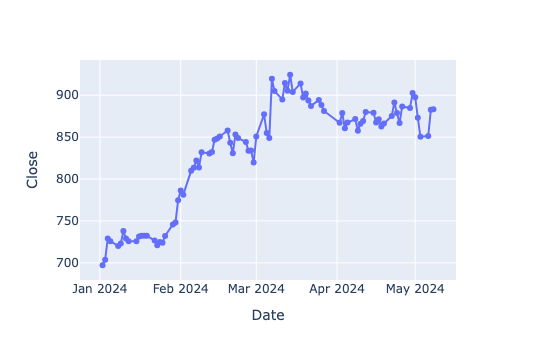

In [20]:
import plotly.express as px
fig = px.line(df,
             x='Date',
             y='Close',
             markers=True)

fig.show()
             